Проведите первичный анализ данных

Проведите визуальный анализ данных

Разбейте данные на обучение и тест

Удалите категориальные признаки

Сделайте предобработку данных с помощью класса и пайплайна

Обучите модель регрессии, с целевым признаком Selling_Price

Оцените подходящие метрики качества

Сформулируйте выводы по проделанной работе

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDRegressor


import warnings
warnings.filterwarnings('ignore')


In [ ]:
!wget https://drive.google.com/uc?id=1VJq6qDgMQx-sM4LuBjimM4K4tQoXiplv -O Car

--2024-05-20 18:41:41--  https://drive.google.com/uc?id=1VJq6qDgMQx-sM4LuBjimM4K4tQoXiplv
Resolving drive.google.com (drive.google.com)... 142.251.16.100, 142.251.16.101, 142.251.16.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1VJq6qDgMQx-sM4LuBjimM4K4tQoXiplv [following]
--2024-05-20 18:41:41--  https://drive.usercontent.google.com/download?id=1VJq6qDgMQx-sM4LuBjimM4K4tQoXiplv
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.122.132, 2607:f8b0:4004:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.122.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17209 (17K) [application/octet-stream]
Saving to: ‘Car’

Car                 100%[===================>]  16.81K  --.-KB/s    in 0s      

2024-05-20 18:41:41 (66.8 MB/s) - ‘Car’ sav

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('Car')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


****
**Первичный анализ данных**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
cat_cols = data.select_dtypes(include = object)
print(data['Car_Name'].value_counts())
print('--------------------------------')
print(data['Fuel_Type'].value_counts())
print('--------------------------------')
print(data['Seller_Type'].value_counts())
print('--------------------------------')
print(data['Transmission'].value_counts())


Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
--------------------------------
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
--------------------------------
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
--------------------------------
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Данные без пропусков, видим аномалии

В среднем - год выпуска автомобиля - 2013, цена на продажу в тот момент - 4.66, текущая цена - 7.62, пробег - 37.000, предыдущего владельца не было

5 вещественных признаков и 4 категориальных

Есть 98 видов машин

3 вида топлива

2 вида продавцов

2 вида коробки передач

****
**Визуальный анализ данных**

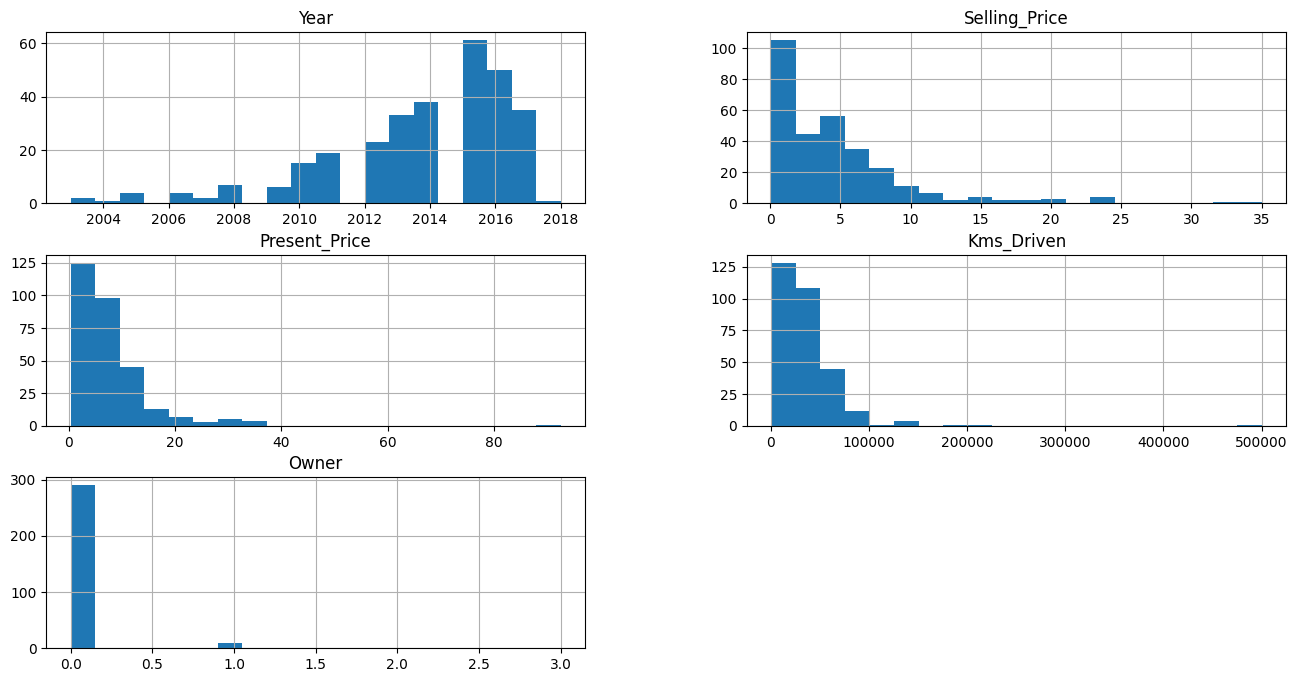

In [ ]:
data.hist(figsize=(16, 8), bins=20);

Как и говорил, у нас имеются некие выбросы.

 В целом по вещественным фичам мало что можно сказать, анализ показал, что большинство машин покупали в 2016 году, цены на них не сильно высокие (на фоне остальных)

 Посмотрим на категориальные признаки

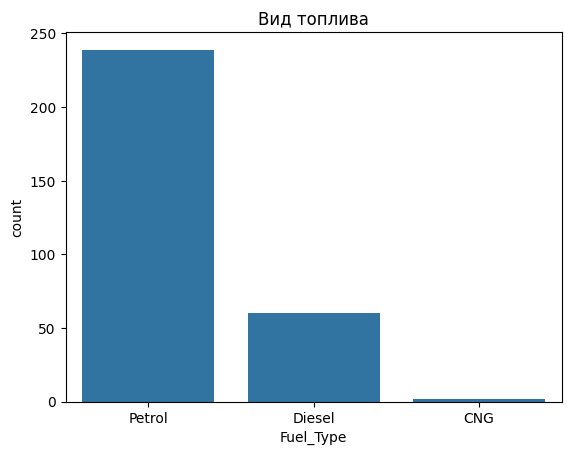

In [ ]:
sns.countplot(x=data['Fuel_Type'])
plt.title('Вид топлива');

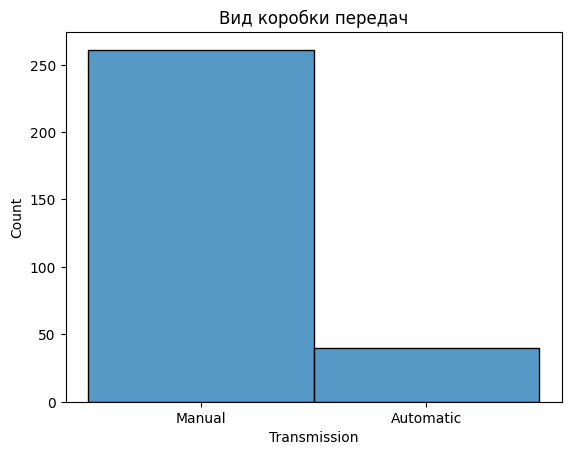

In [ ]:
sns.histplot(x=data['Transmission'])
plt.title('Вид коробки передач');

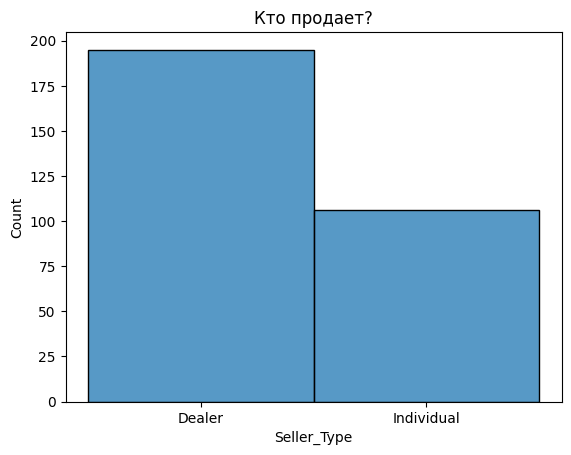

In [ ]:
sns.histplot(x=data['Seller_Type'])
plt.title('Кто продает?');

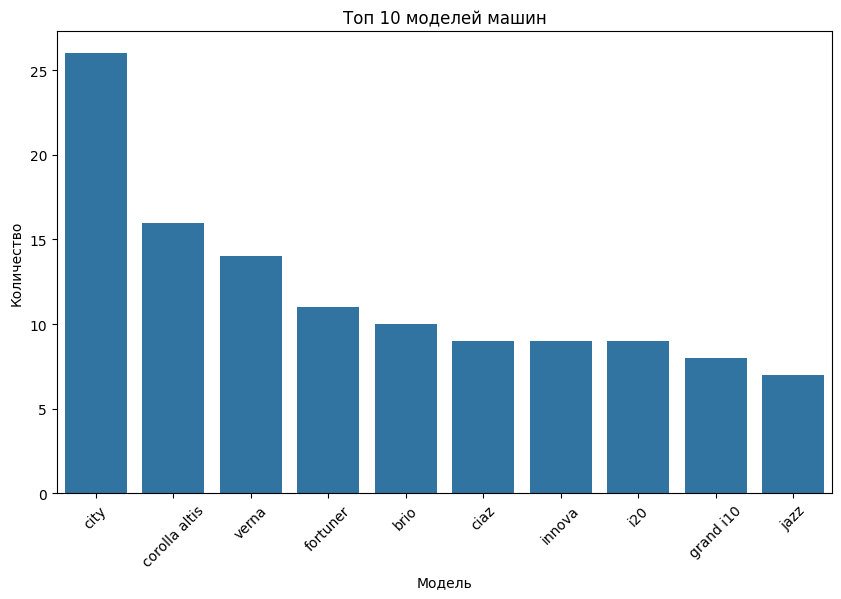

In [ ]:
car_top = data['Car_Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=car_top.index, y=car_top.values)
plt.xlabel('Модель')
plt.ylabel('Количество')
plt.title('Топ 10 моделей машин')
plt.xticks(rotation=45)
plt.show()

Большинство машин на бензине, с механической коробкой передач, продают в основном диллеры, лидер продаж - Honda city


---

Посмотрим на взаимодействие таргета с разными фичами

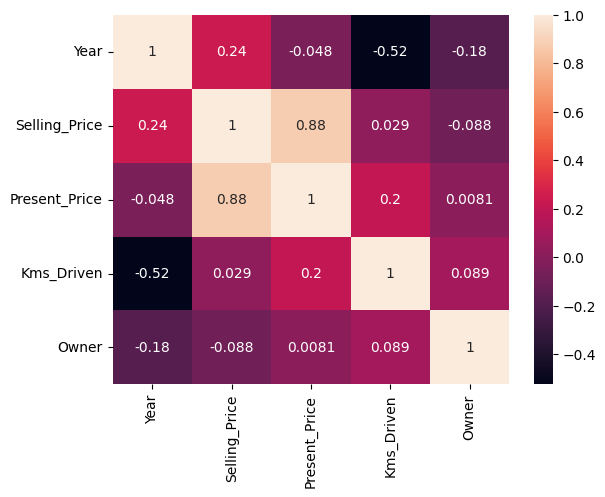

In [ ]:
matrix = data.drop(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'],  axis=1)
corr = matrix.corr()

sns.heatmap(corr, linecolor='white', annot=True);

С таргетом видим лишь одну линейную зависимость. В остальном - корелляция минимальная

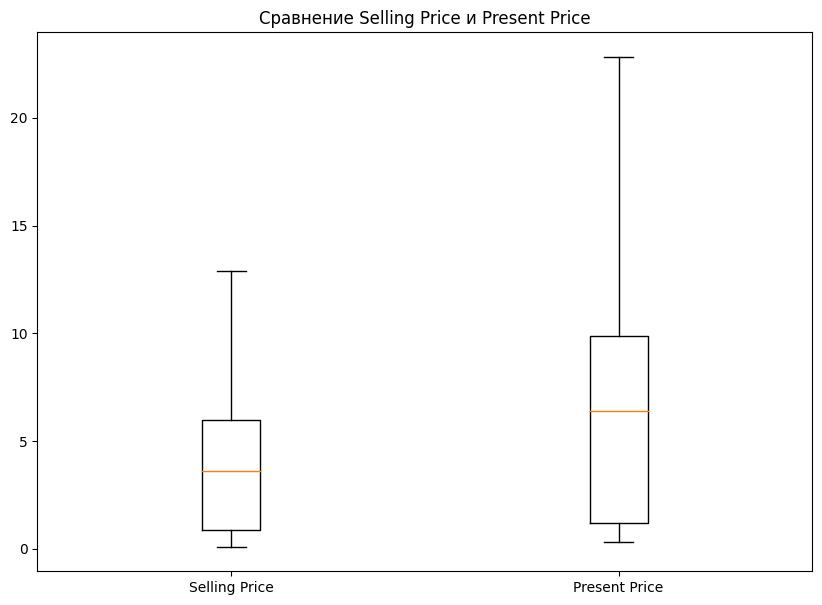

In [ ]:
plt.figure(figsize=(10, 7))

plt.boxplot([data['Selling_Price'], data['Present_Price']], showfliers=False)

plt.title('Сравнение Selling Price и Present Price')
plt.xticks([1, 2], ['Selling Price', 'Present Price'])

plt.show()

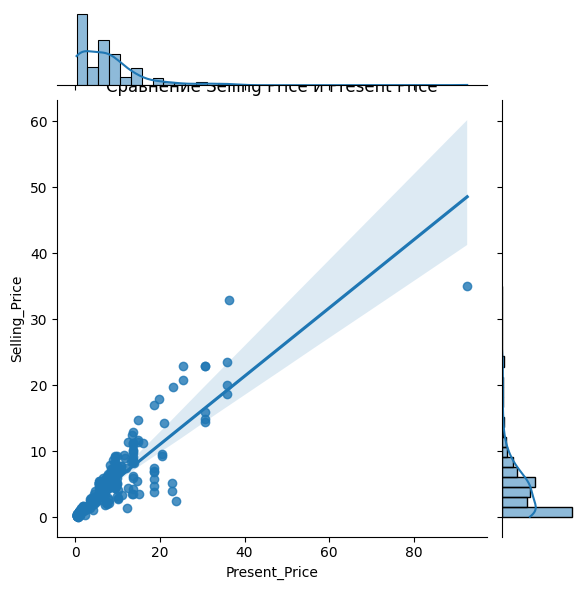

In [ ]:
sns.jointplot(x = data['Present_Price'], y = data['Selling_Price'], kind='reg')

plt.title('Сравнение Selling Price и Present Price')

plt.show()

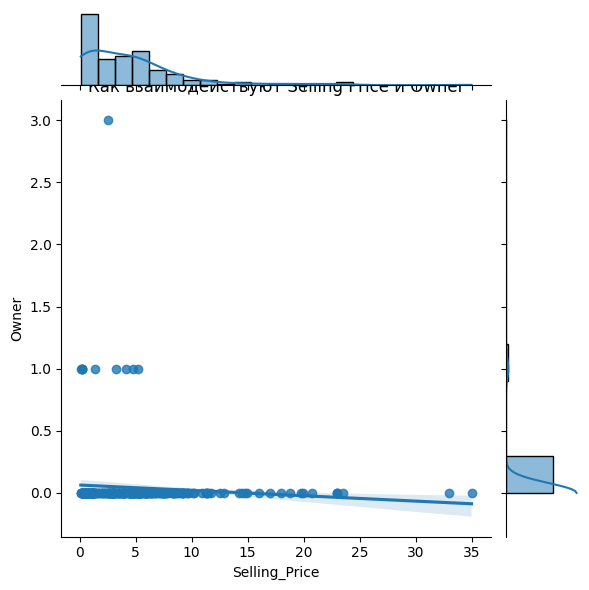

In [ ]:
sns.jointplot(x = data['Selling_Price'], y = data['Owner'], kind='reg')

plt.title('Как взаимодействуют Selling Price и Owner')

plt.show()



---


Поработаем с категориальными признаками

In [ ]:
cat_cols

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


**Мысли**

Колоки Fuel_Type, Seller_Type, Transmission - имеют мало уникальных значений. в каждой колонке по 2-3 различных значения. К ним мы будем применять One Hot Encoding

В колонке Car Name 98 уникальных значений, попробуем для начала Mean Target Encoding, посмотрим как он проявит себя.

In [ ]:
data.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [ ]:
data_train = data.copy() #Сделаем копию, чтобы к основному датасету позже применить иные методы

In [ ]:

for col in cat_cols:

      if data_train[col].nunique() < 4:
          one_hot = pd.get_dummies(data_train[col], prefix=col, drop_first=True)
          data_train = pd.concat((data_train.drop(col, axis=1), one_hot), axis=1)

      else:
          mean_target = data_train.groupby(col)['Selling_Price'].mean()
          data_train[col] = data_train[col].map(mean_target)


In [ ]:
data_train.replace({False: 0, True: 1}, inplace=True)


In [ ]:
data_train.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2.862500,2014,3.35,5.59,27000,0,0,1,0,1
1,3.158333,2013,4.75,9.54,43000,0,1,0,0,1
2,7.472222,2017,7.25,9.85,6900,0,0,1,0,1
3,2.512500,2011,2.85,4.15,5200,0,0,1,0,1
4,4.540000,2014,4.60,6.87,42450,0,1,0,0,1




---

Разделим данные, сделаем PipeLine

In [ ]:
x = data_train.drop('Selling_Price', axis=1)
y = data_train['Selling_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Обработаем некоторые выбросы, дадим им максимальное значение.

In [ ]:
class DataPipeline(BaseEstimator, TransformerMixin):

    def __init__(self):

        self.Kms_Driven_max = None
        self.Present_Price_max = None



    def fit(self, data_train, y=None):

        self.Kms_Driven_max = 400_000
        self.Present_Price_max = 36

        return self

    def transform(self, data_train, y=None):

        data_train.loc[data_train['Kms_Driven'] > self.Kms_Driven_max, 'Kms_Driven'] = self.Kms_Driven_max

        data_train.loc[data_train['Present_Price'] > self.Present_Price_max, 'Present_Price'] = self.Present_Price_max




        return data_train

In [ ]:
pipe = DataPipeline()
pipe.fit(x_train)

x_train = pipe.fit_transform(x_train)
x_test = pipe.transform(x_test)

x_train.head()

,Car_Name,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
184,0.300000,2008,0.750,26000,1,0,1,1,1
132,0.790000,2017,0.950,3500,0,0,1,1,1
194,0.200000,2008,0.787,50000,0,0,1,1,1
75,4.266667,2015,6.800,36000,0,0,1,0,1
111,1.162500,2016,1.500,8700,0,0,1,1,1


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


pipe = make_pipeline(
    DataPipeline(),
    StandardScaler()
)

x_train = pipe.fit_transform(x_train)
x_test = pipe.transform(x_test)



---

Обучим модель и оценим ее

In [ ]:
model_ls = LinearRegression()
model_ls.fit(x_train, y_train)
y_pred_test = model_ls.predict(x_test)
y_pred_train= model_ls.predict(x_train)

Train R2 0.897249762950954
Test R2 0.8652948596181385
Train RMSE: 1.6481546821599347
Test RMSE: 1.7615367287070496


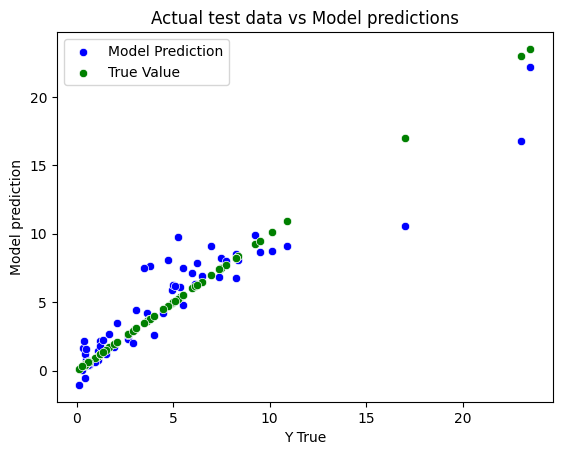

In [ ]:
print('Train R2', r2(y_train, y_pred_train))
print('Test R2', r2(y_test, y_pred_test))

print('Train RMSE:', np.sqrt(mse(y_train, y_pred_train)))
print('Test RMSE:', np.sqrt(mse(y_test, y_pred_test)))

sns.scatterplot(x=y_test, y=y_pred_test, color='blue', label='Model Prediction')


sns.scatterplot(x=y_test, y=y_test, color='green', label='True Value')

plt.xlabel('Y True')
plt.ylabel('Model prediction')
plt.title('Actual test data vs Model predictions')
plt.legend()
plt.show()


****
**Первые выводы:**

Видно, что модель пролетает на выбросах, что явно ухудшает ее обучение и результаты.

Попробуем через Lasso


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model_lasso = Lasso(alpha=0.1, max_iter=10000)
model_lasso.fit(x_train, y_train)
y_pred_lassoTR =  model_lasso.predict(x_train)
y_pred_lassoTE =  model_lasso.predict(x_test)

print('Train R2', r2(y_train, y_pred_lassoTR))
print('Test R2', r2(y_test, y_pred_lassoTE))

print('Train RMSE:', np.sqrt(mse(y_train, y_pred_lassoTR)))
print('Test RMSE:', np.sqrt(mse(y_test, y_pred_lassoTE)))

Train R2 0.8954682333096694
Test R2 0.8566225050567554
Train RMSE: 1.662381501551173
Test RMSE: 1.817356432588995


Попробуем через градиентный спуск

In [ ]:
model = SGDRegressor(learning_rate='constant', eta0=0.001, max_iter=1000, tol=1e-6)
model.fit(x_train, y_train)

y_predSGD_test = model.predict(x_test)
y_predSGD_train = model.predict(x_train)


print('Train R2', r2(y_train, y_predSGD_train))
print('Test R2', r2(y_test, y_predSGD_test))

print('Train RMSE:', np.sqrt(mse(y_train, y_predSGD_train)))
print('Test RMSE:', np.sqrt(mse(y_test, y_predSGD_test)))

Train R2 0.8971979738663284
Test R2 0.864916967998527
Train RMSE: 1.6485699885959404
Test RMSE: 1.764005839255359


****
**Выводы:**
****
Аномалии: Можно было выкинуть сильно аномальные в цене данные, но я решил этого не делать, так как при реальной задаче у заказчика - модель может дать очень неправильный ответ (Вопрос, а правильно ли я поступил? Ведь если бы я обрубил данные по квантилю 85, то модель бы стала гораздо и гораздо точнее)

Категориальные признаки: К сожалению, пока не нахожу иных вариантов для обработки этих данных. Мысль про tf-idf отпала, так как он лучше подходит для документации и предложений каких-нибудь, а у нас название машины в одно-два слова, которое не так нужно оборачивать в вектор. В данном случае лучшим подходом считаю Mean Targer Encoding

Модель: Обычная линейная регрессия показала лучший результат. Может, я не правильно построил модель Lasso / сделал неправильно градиентный спуск. Плюс, как я понял, SGD лучше подходит для задач классификации.